In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

In [4]:
tf.config.experimental.list_physical_devices()

##run gpu
##version info
#3tensorflow 2.2.0 cudnn 7.6.5 and cuda 10.1 and python 3.8

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
tf.test.is_built_with_cuda()

True

In [7]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [8]:
len(x_train)

50000

In [9]:
len(x_test)

10000

In [10]:
x_train.shape  ##50k samples 32 height 32 width and 3 colors rgb

(50000, 32, 32, 3)

In [12]:
y_train.shape

(50000, 1)

In [13]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

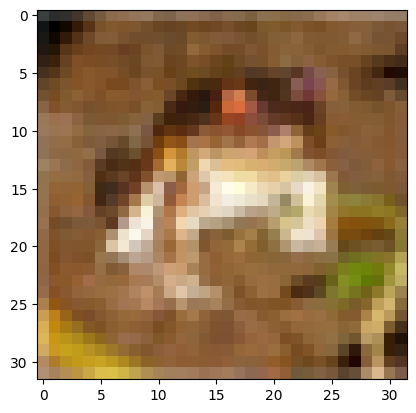

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [15]:
##scaling images
x_train=x_train/255
x_test=x_test/255

In [16]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [18]:
#one hot encoding
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_train[:5]

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]

In [19]:
y_test=to_categorical(y_test,10)
y_test[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [20]:
#flatten the x_train x_test
x_train=x_train.reshape(50000,32*32*3)
x_train.shape

(50000, 3072)

In [21]:
x_test.shape

(10000, 32, 32, 3)

In [52]:
##flattening x_test
x_test=x_test.reshape(len(x_test),32*32*3)
x_test.shape

(10000, 3072)

In [30]:
y_test.shape

(10000, 10)

In [36]:
y_train = np.argmax(y_train, axis=2)

print(y_train.shape)

(50000, 10)


In [69]:
model=keras.Sequential([
    keras.layers.Dense(3000,input_shape=(3072,),activation="relu"),
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train,y_train,epochs=50)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 859s 548ms/step - accuracy: 0.2562 - loss: 2.1849
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 867s 551ms/step - accuracy: 0.3782 - loss: 1.7351
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 889s 569ms/step - accuracy: 0.3989 - loss: 1.6573
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 908s 560ms/step - accuracy: 0.4229 - loss: 1.5950
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 932s 566ms/step - accuracy: 0.4380 - loss: 1.5482
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 880s 563ms/step - accuracy: 0.4585 - loss: 1.5041
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 925s 565ms/step - accuracy: 0.4736 - loss: 1.4699
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 873s 558ms/step - accuracy: 0.4774 - loss: 1.4501
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 876s 560ms/step - accuracy: 0.4883 - loss: 1.4203
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 873s 559ms/step - accuracy: 0.4921 - loss: 1.3973
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 871s 557ms/step - accuracy: 0.5068 -

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-299049606.py", line 14, in <cell line: 0>
    model.fit(x_train,y_train,epochs=50)
  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 378, in fit
    callbacks.on_train_batch_end(step, logs)
  File "/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/callback_list.py", line 172, in on_train_batch_end
    self._on_train_batch_end(batch, logs)
  File "/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/callback_list.py", line 194, in _on_train_batch_end
    callback.on_train_batch_end(batch, logs=logs)
  File "/usr/local/lib/python3.12/dist

TypeError: object of type 'NoneType' has no len()

In [41]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.3675 - loss: 1.7563


[1.755479097366333, 0.3702999949455261]

In [57]:
y_predict=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step


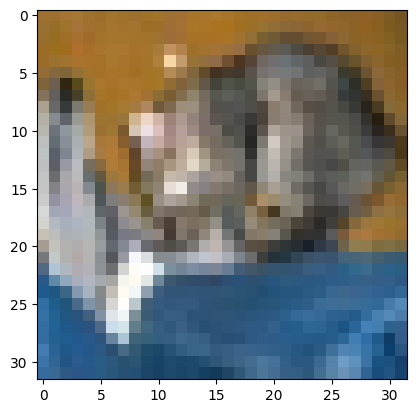

In [56]:
plt.imshow(x_test[0].reshape(32,32,3))
plt.show()

In [66]:
y_predict[0][0]

np.float32(0.5704257)

In [67]:
x_test[0][0]

np.float64(0.6196078431372549)

In [68]:
y_test[0][0]

np.float64(0.0)

In [65]:
np.argmax(y_predict[0][0])

np.int64(0)